# **EDA - Previsão Vendas Produto ALFA**
## Série Temporal
*O intuito é analisar padrões, outliers e a evolução das vendas ao longo do tempo para identificar sazonalidade e picos.*

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Layout visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

#Puxando o Parquet
df = pd.read_parquet(r'C:/Users/João Pedro/Desktop/previsao_vendas/dados/silver/vendas_limpos.parquet')

df.head()

,data,vendas,dia_da_semana,em_promocao,feriado_nacional
0,2023-01-01,182,domingo,True,False
1,2023-01-02,485,segunda-feira,False,False
2,2023-01-03,398,terça-feira,False,False
3,2023-01-04,320,quarta-feira,False,False
4,2023-01-05,156,quinta-feira,False,False


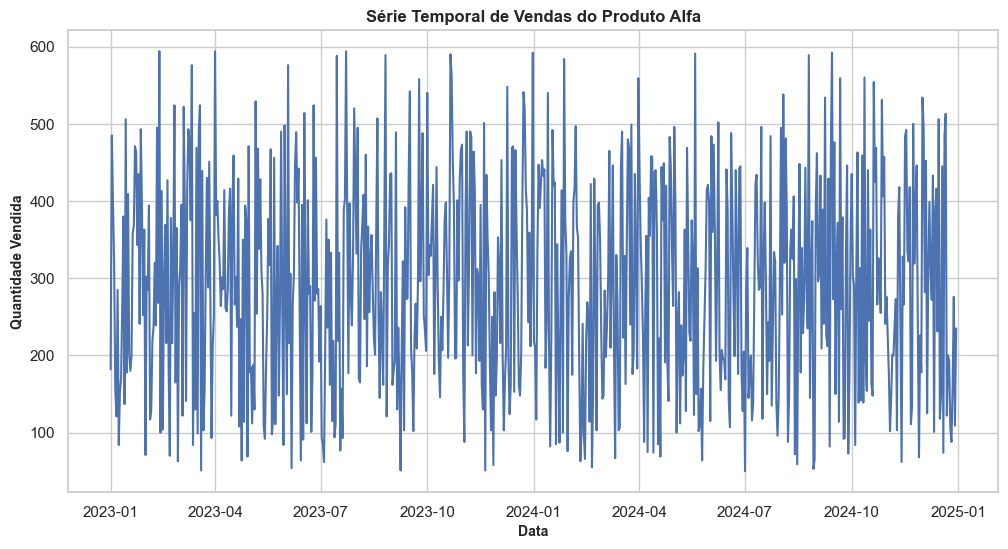

In [40]:
plt.plot(df['data'], df['vendas'])
plt.title("Série Temporal de Vendas do Produto Alfa", fontsize=12, fontweight='bold')
plt.xlabel("Data", fontsize=10, fontweight='bold')
plt.ylabel("Quantidade Vendida", fontsize=10, fontweight='bold')
plt.show()


# **Série Temporal - Produto Alfa**
*Plotamos a série temporal das vendas diárias do Produto Alfa ao longo de 2 anos.  
O eixo X representa as datas e o eixo Y a quantidade vendida.*

>Tendência: Estável ao longo do tempo
>Sazonalidade: Não há padrão sazonal claro visível
>Volatilidade: Alta variação diária nas vendas
>Outliers: Picos e quedas bruscas frequentes
>Demanda: Mantém-se em torno de 200–400 unidades por dia


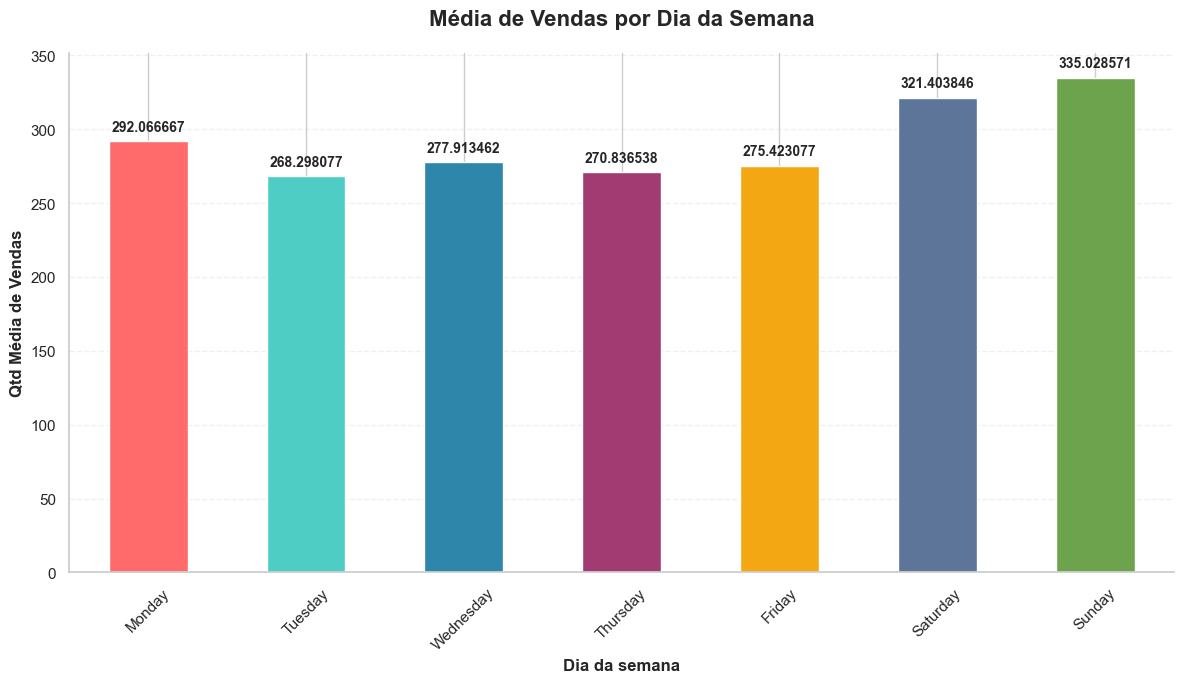

In [30]:
#Agrupando Vendas por dia da semana
vendas_por_dia = df.groupby('dia_da_semana')['vendas'].mean().reindex(
['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


plt.figure(figsize=(12,7))
ax = vendas_por_dia.plot(kind='bar', color=['#FF6B6B','#4ECDC4','#2E86AB',
                                            '#A23B72','#F3A712','#5D7599','#6DA34D'])

plt.title("Média de Vendas por Dia da Semana", fontsize=16, fontweight='bold',pad=20)
plt.ylabel("Qtd Média de Vendas", fontsize=12, fontweight='bold')
plt.xlabel("Dia da semana", fontsize=12, fontweight='bold')

for i, v in enumerate(vendas_por_dia):
    ax.text(i, v + 5, f'{v:1f}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)
    
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3, linestyle='--')
sns.despine()
plt.tight_layout()

plt.show()
    


# **Vendas por semana**

> Finais de semana têm maior volume: Sábado e Domingo apresentam as maiores médias de vendas;
> Segunda a Sexta: Volumes mais baixos e relativamente estáveis durante a semana;
> Domingo é o dia mais forte: Maior média de vendas entre todos os dias.

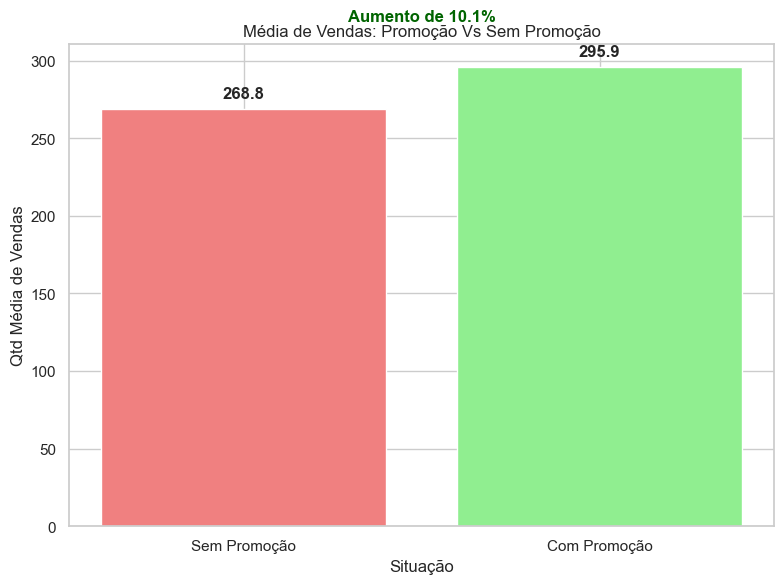

In [23]:
#Comparação entre Vendas e Promoção
media_c_promocao = df[df['em_promocao'] == True]['vendas'].mean()
media_s_promocao = df[df['em_promocao'] == False]['vendas'].mean()
aumento_percentual = ((media_s_promocao - media_c_promocao) / media_c_promocao) * 100

categorias = ['Sem Promoção', 'Com Promoção']
medias = [media_c_promocao, media_s_promocao]

plt.figure(figsize=(8, 6))
bars = plt.bar(categorias, medias, color = ['Lightcoral', 'Lightgreen'])
plt.title("Média de Vendas: Promoção Vs Sem Promoção")
plt.xlabel('Situação')
plt.ylabel('Qtd Média de Vendas')

#Valores das barras
for i, v in enumerate(medias):
    plt.text(i, v + 5, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

#Percentual do aumento
plt.text(0.5, max(medias) * 1.1, f'Aumento de {aumento_percentual:.1f}%',
         ha='center', fontsize=12, fontweight='bold', color='darkgreen')

plt.tight_layout()
plt.show()

# **Vendas com e sem Promoção**

Promoção (True):
>Mediana significativamente mais alta
>Maior variabilidade nas vendas
>Presença de outliers superiores

Sem Promoção (False):
>Mediana mais baixa
>Menor variabilidade nos dados
>Distribuição mais concentrada

Promoções aumentam significativamente o volume médio de vendas.

C:\Users\João Pedro\AppData\Local\Temp\ipykernel_1356\262991172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='feriado_nacional', y='vendas', data=df,


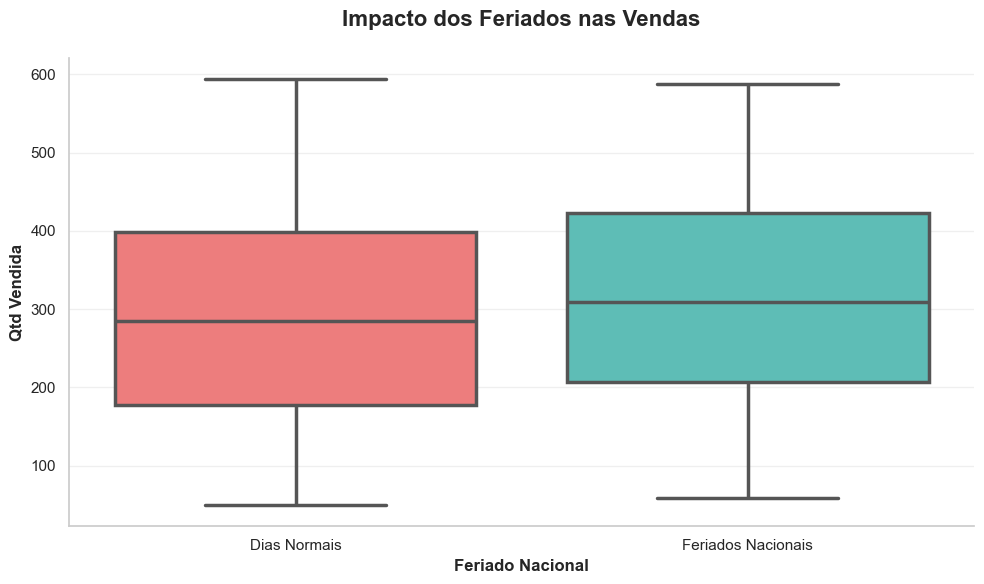

In [41]:
#impacto dos feriados
plt.figure(figsize=(10,6))
sns.boxplot(x='feriado_nacional', y='vendas', data=df,
            palette=['#FF6B6B', '#4ECDC4'], linewidth=2.5)
plt.title('Impacto dos Feriados nas Vendas\n', fontsize=16, fontweight='bold')
plt.xlabel('Feriado Nacional', fontsize=12, fontweight='bold')
plt.ylabel('Qtd Vendida', fontsize=12, fontweight='bold')
plt.xticks([0,1],['Dias Normais', 'Feriados Nacionais'])
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

# **Impacto do Feriado**
>Feriados não necessariamente aumentam vendas - Mediana similar sugere que o volume médio não difere significativamente
>Consistência operacional - Feriados apresentam menor variabilidade, possivelmente por terem comportamento mais previsível
>Oportunidade perdida - Considerar estratégias de promoção específicas para feriados


In [42]:
df.describe()

,data,vendas
count,730,730.000000
mean,2023-12-31 12:00:00,291.627397
min,2023-01-01 00:00:00,50.000000
25%,2023-07-02 06:00:00,178.000000
50%,2023-12-31 12:00:00,285.500000
75%,2024-06-30 18:00:00,399.000000
max,2024-12-30 00:00:00,594.000000
std,NaN,137.431797


# **visualização Área de Vendas**

Período: 730 dias (cerca de 2 anos de dados diários);
>Média de vendas: 292 unidades por dia;
>Mediana: 285,5 unidades -> próxima da média -> distribuição relativamente equilibrada;
>Desvio padrão: 137 -> indica alta variabilidade entre os dias;
>Mínimo: 50 unidades -> dias de vendas muito baixas;
>Máximo: 594 unidades -> dias de pico elevado.

- Distribuição interquartílica:
>25% dos dias vendem menos de 178;
>75% dos dias vendem menos de 399;
-> mostra ampla variação entre os dias típicos.